In [467]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-stroke-dataset/brain_stroke.csv


In [468]:
#Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Basic Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

#Metrics (Computation)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

#Boosting Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#Neural Network Model
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

#  **Attribute Information**

1) gender: "Male", "Female" or "Other"

2) age: age of the patient

3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

4) heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 

5) Ever-married: "No" or "Yes"

6) work type: "children", "Govtjov", "Never worked", "Private" or "Self-employed"

7) Residencetype: "Rural" or "Urban"

8) avg glucose level: average glucose level in blood

9) BMI: body mass index

10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

11) stroke: 1 if the patient had a stroke or 0 if not

# **EDA+Cleaning Data**

In [469]:
df=pd.read_csv("/kaggle/input/brain-stroke-dataset/brain_stroke.csv")
display(df.head())


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [470]:
display(df.describe())
display(df.info())

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


None

### There are no null values to worry about

In [471]:
df["gender"] = df["gender"].apply(lambda x: 1 if x == "Female" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x == "Yes" else 0)

0    4733
1     248
Name: stroke, dtype: int64


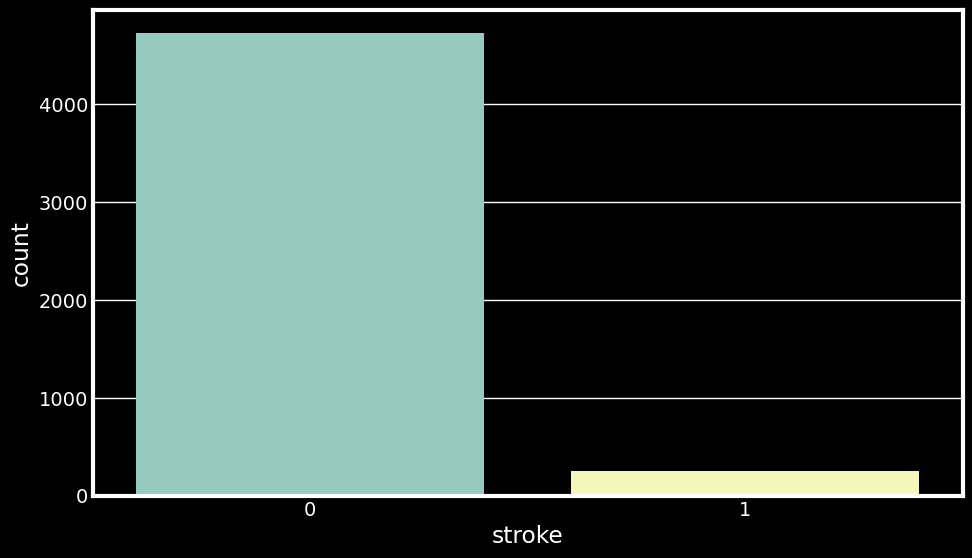

In [472]:
#Output variable
print(df['stroke'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot(data=df, x = "stroke")
plt.show()

# **Over sampling**

### There is an over sampling of people without strokes. We will use one hot encoding and then SMOTE to fix this issue

In [473]:
df = pd.get_dummies(df, columns=['work_type','Residence_type','smoking_status'], drop_first=True)


In [474]:
from imblearn.over_sampling import SMOTE
Y=df['stroke']
X=df.drop(['stroke'],axis=1)
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)
df2=df
df=pd.concat([X, Y], axis=1)

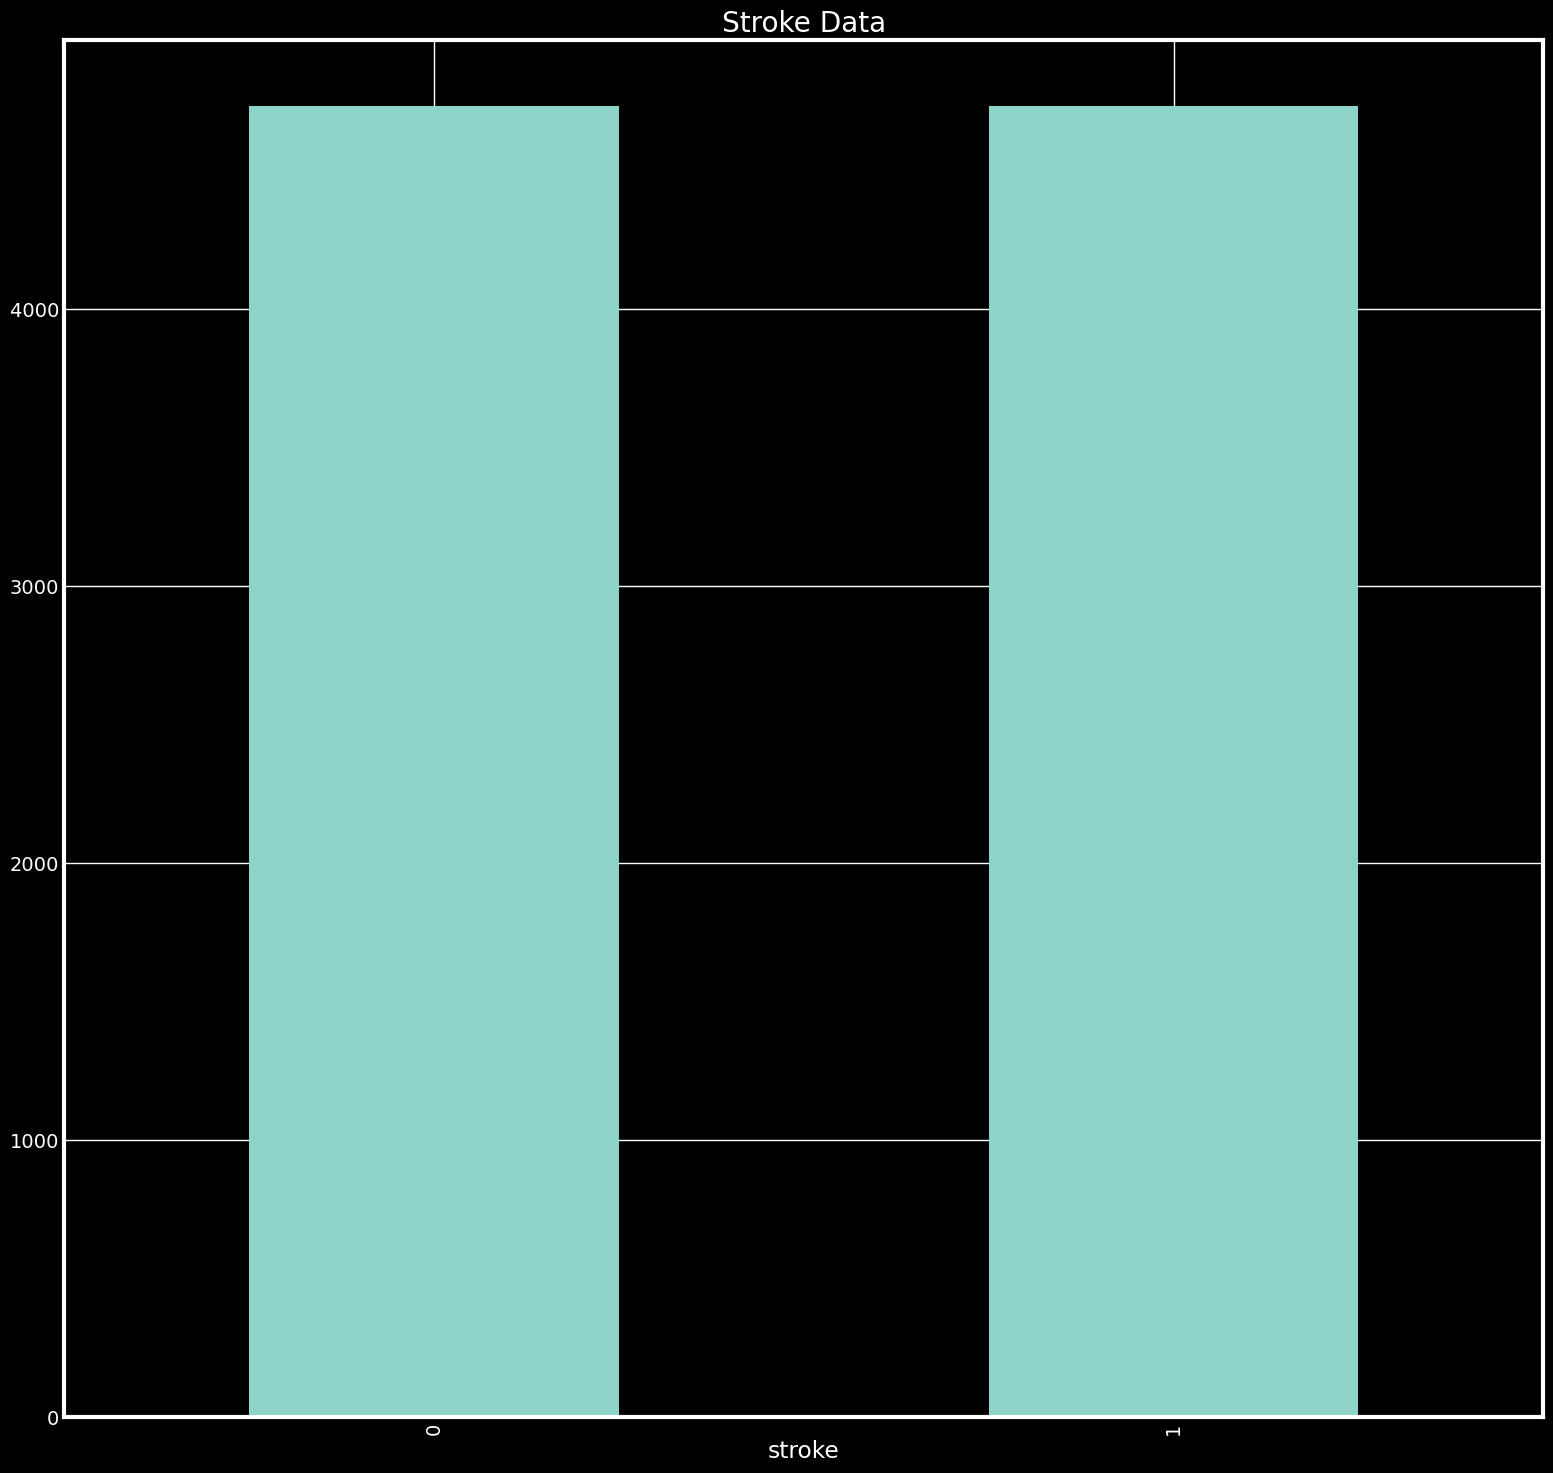

In [475]:
df3 = data2.groupby('stroke').count()
plt.figure(figsize=(17,17))
df3['age'].plot(kind='bar')
plt.title ("Stroke Data")
xmin, xmax, ymin, ymax = plt.axis()
plt.show()

In [476]:
display(df.head())
display(df2.head())

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,67.0,0,1,1,228.69,36.6,1,0,0,1,1,0,0,1
1,0,80.0,0,1,1,105.92,32.5,1,0,0,0,0,1,0,1
2,1,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,1,1
3,1,79.0,1,0,1,174.12,24.0,0,1,0,0,0,1,0,1
4,0,81.0,0,0,1,186.21,29.0,1,0,0,1,1,0,0,1


,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,228.69,36.6,1,1,0,0,1,1,0,0
1,0,80.0,0,1,1,105.92,32.5,1,1,0,0,0,0,1,0
2,1,49.0,0,0,1,171.23,34.4,1,1,0,0,1,0,0,1
3,1,79.0,1,0,1,174.12,24.0,1,0,1,0,0,0,1,0
4,0,81.0,0,0,1,186.21,29.0,1,1,0,0,1,1,0,0


### separate categorical data and continuous data

In [477]:

cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type_Private',
            'work_type_Self-employed','work_type_children','Residence_type_Urban' ,'smoking_status_formerly smoked',
            'smoking_status_never smoked','smoking_status_smokes', 'stroke']
cat_data = df[cat_cols]
con_cols = ['age', 'avg_glucose_level', 'bmi']
con_data = df[con_cols]

### Graphs of categorical variables

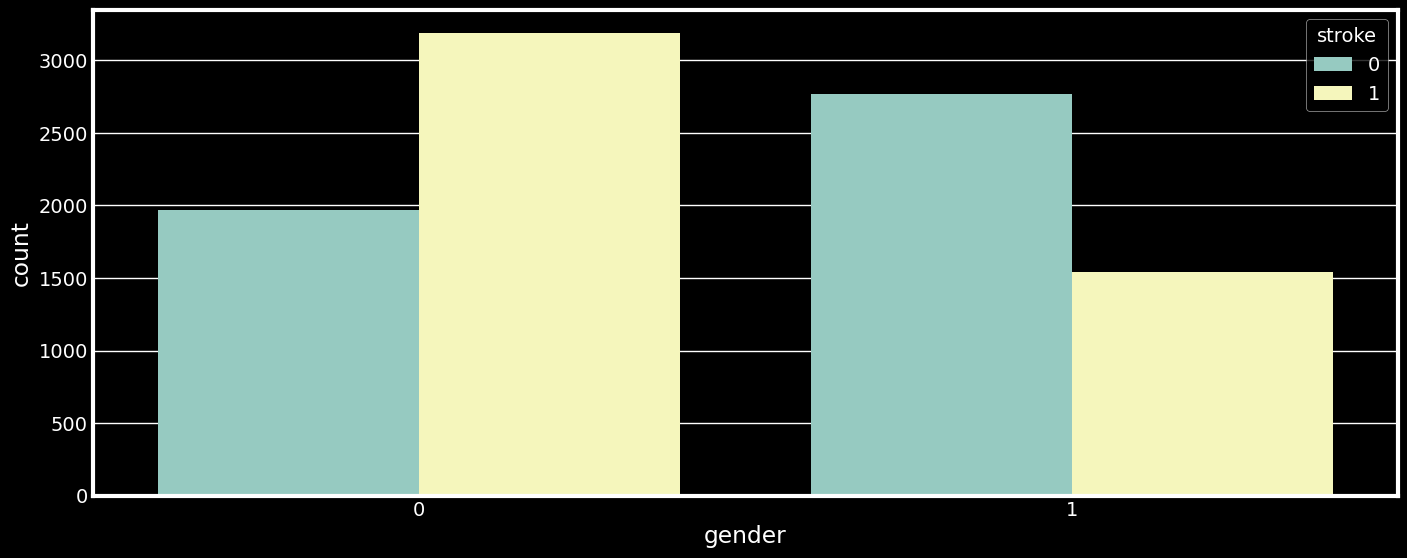

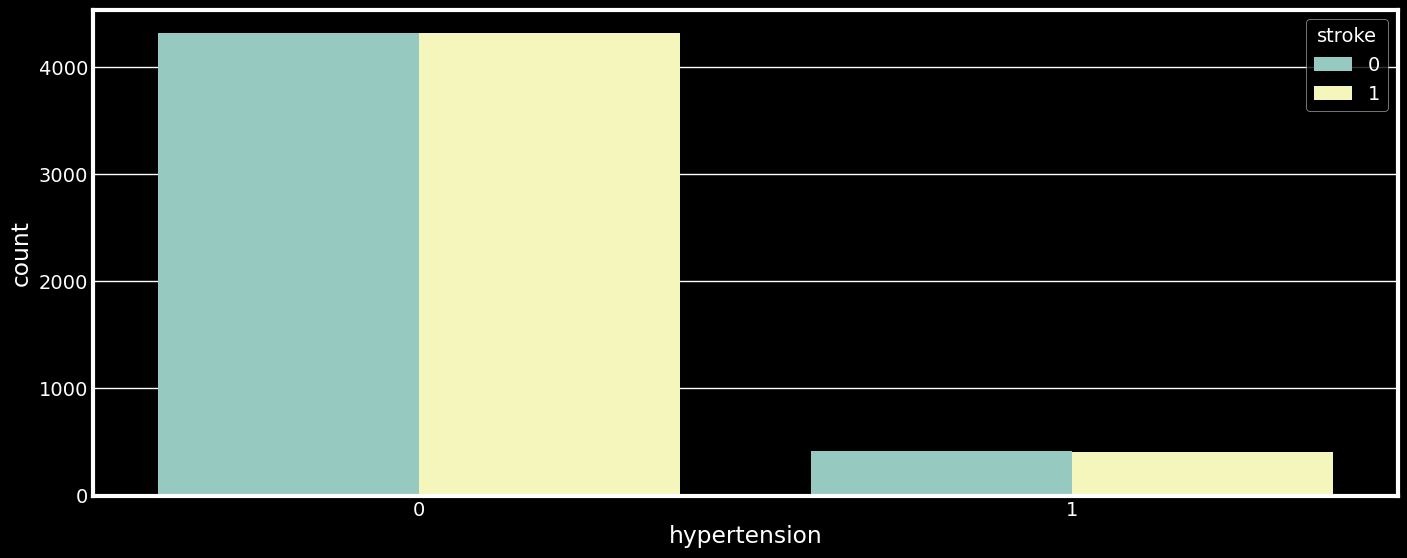

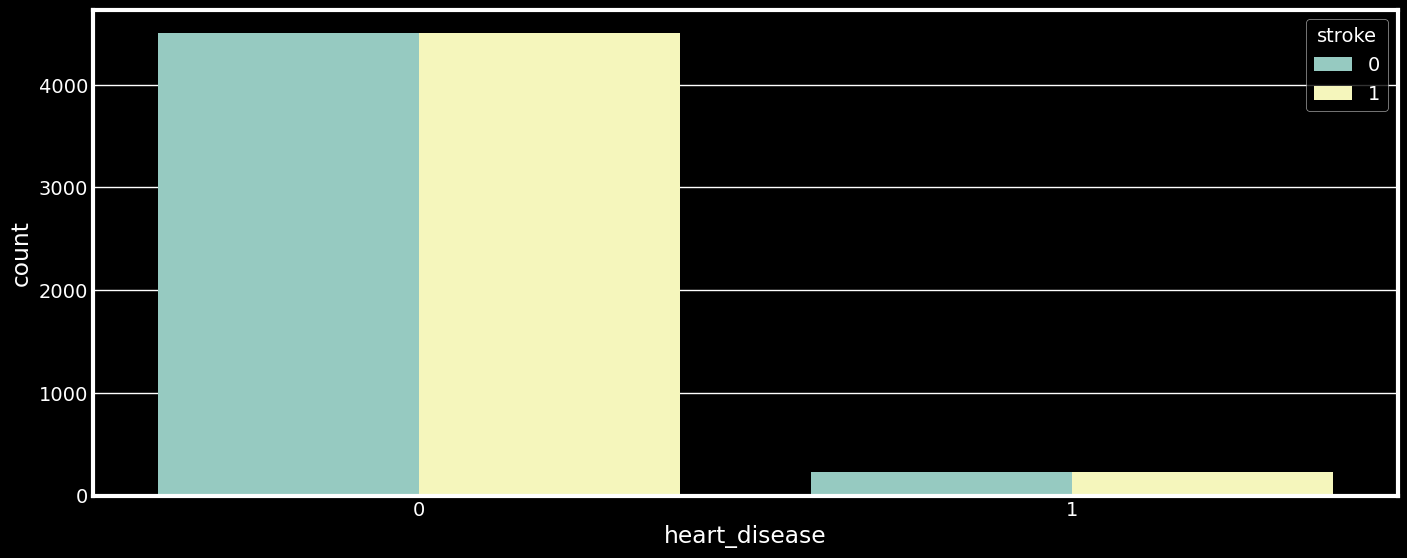

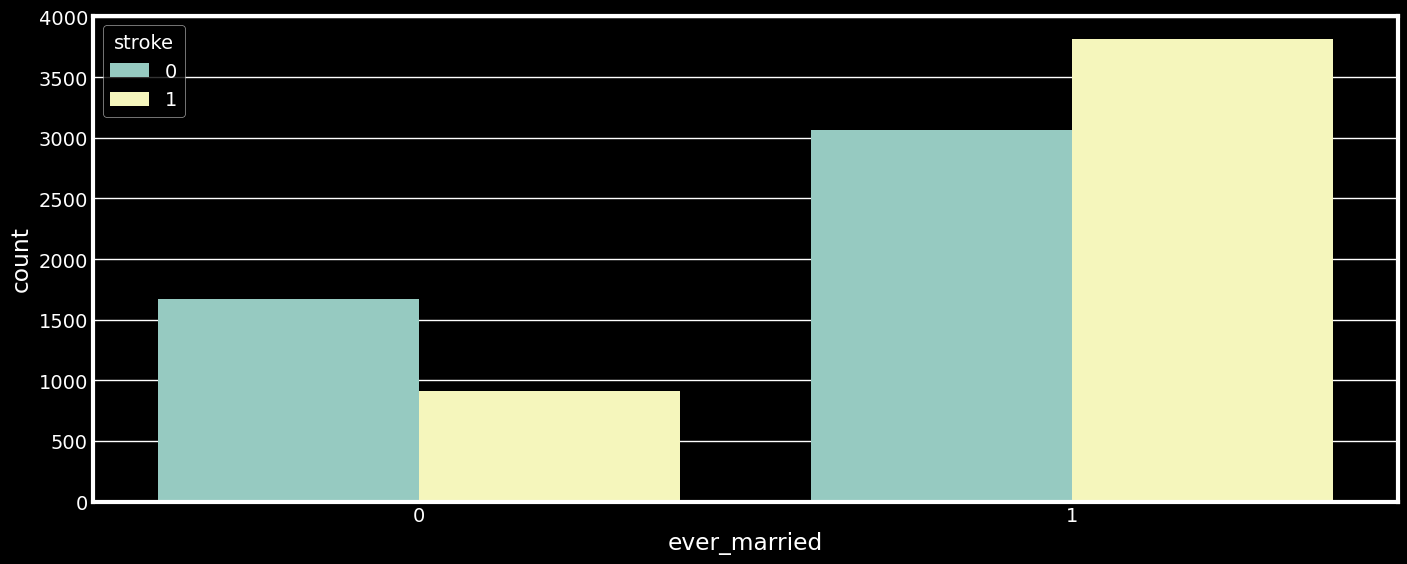

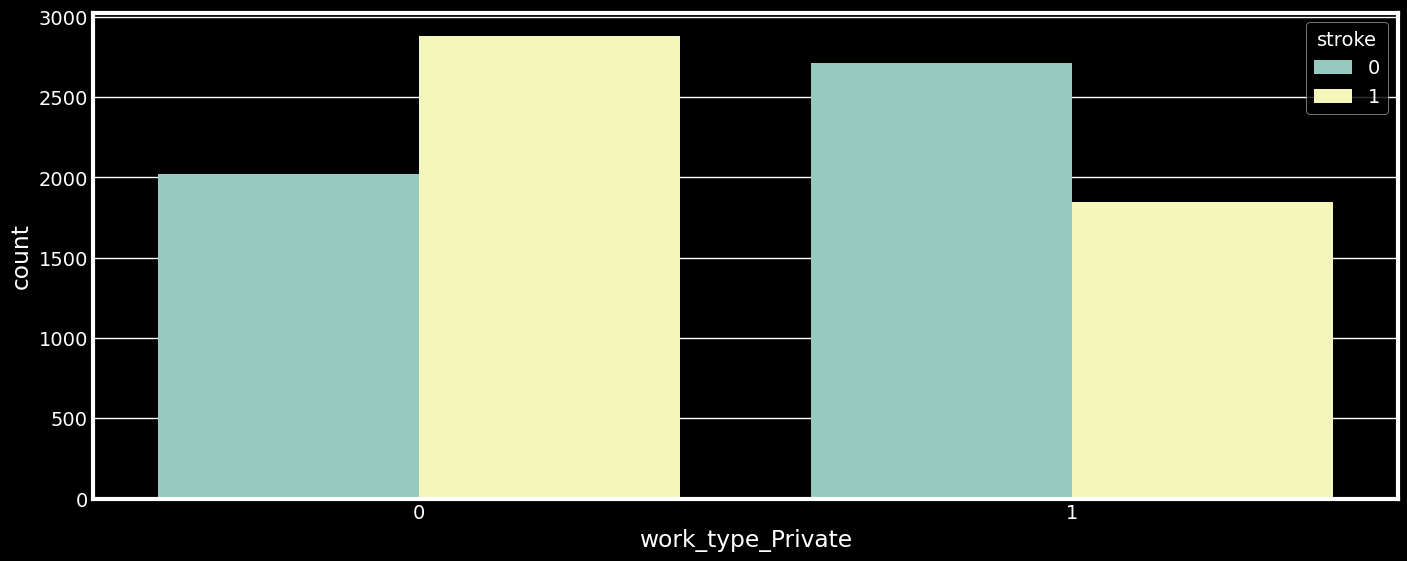

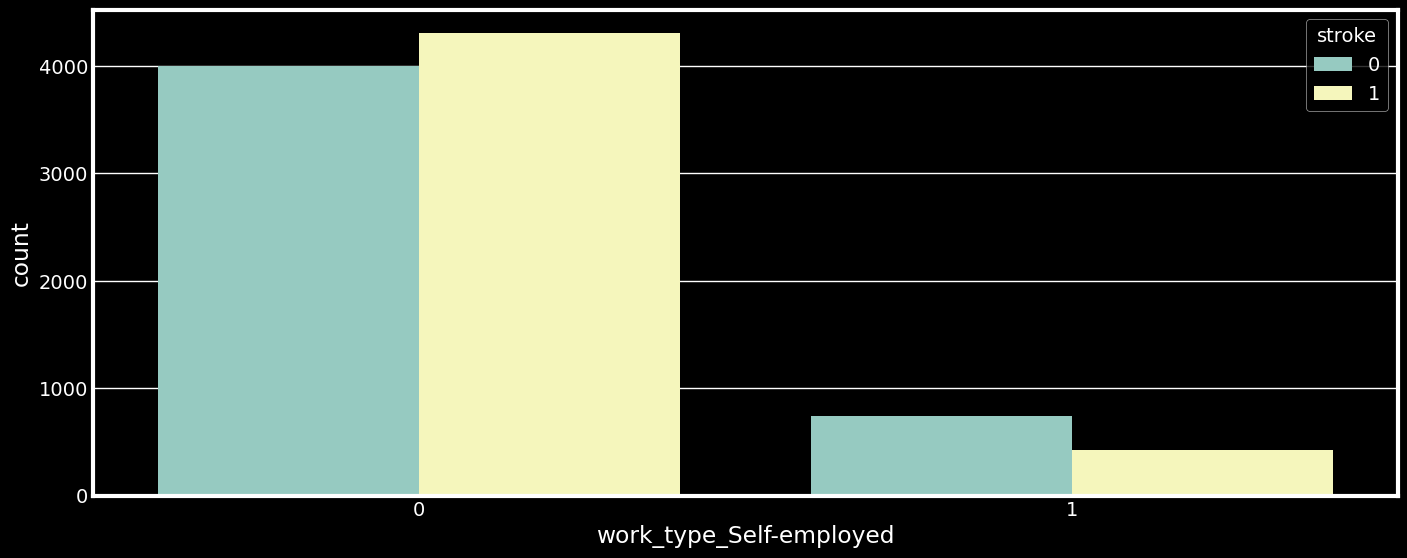

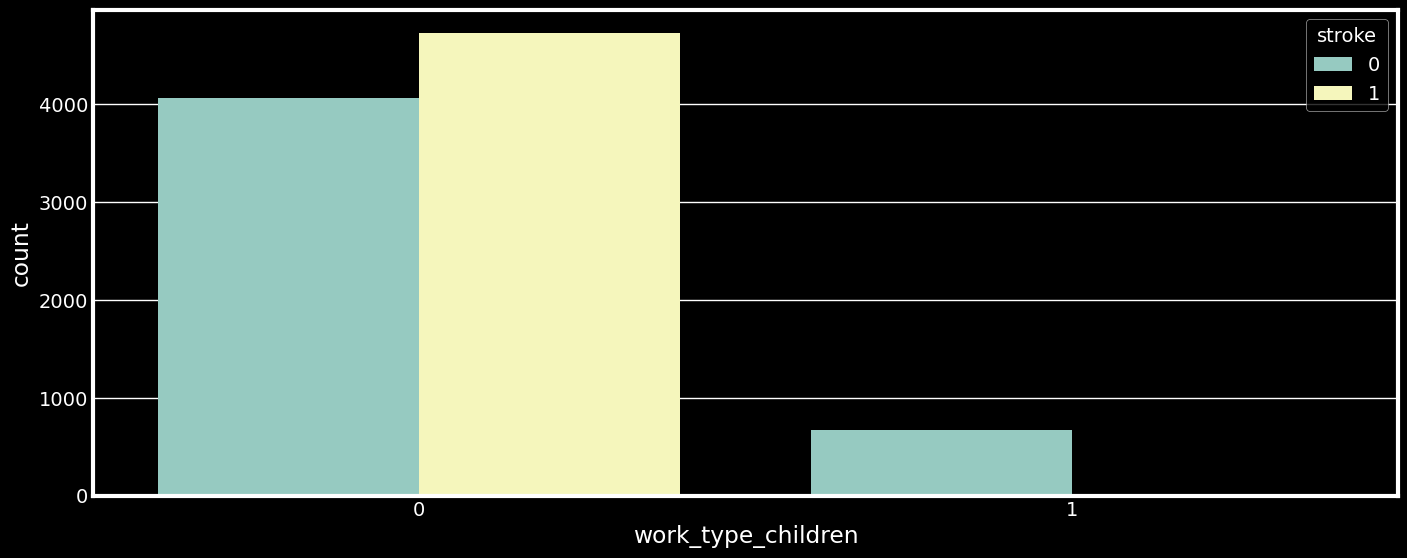

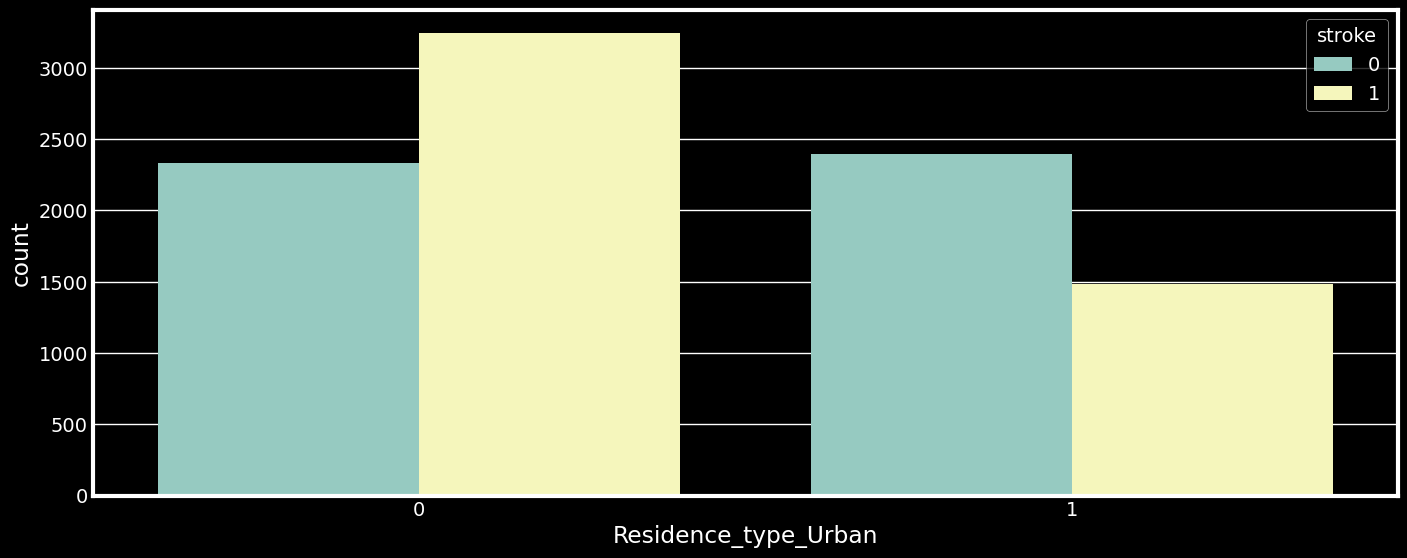

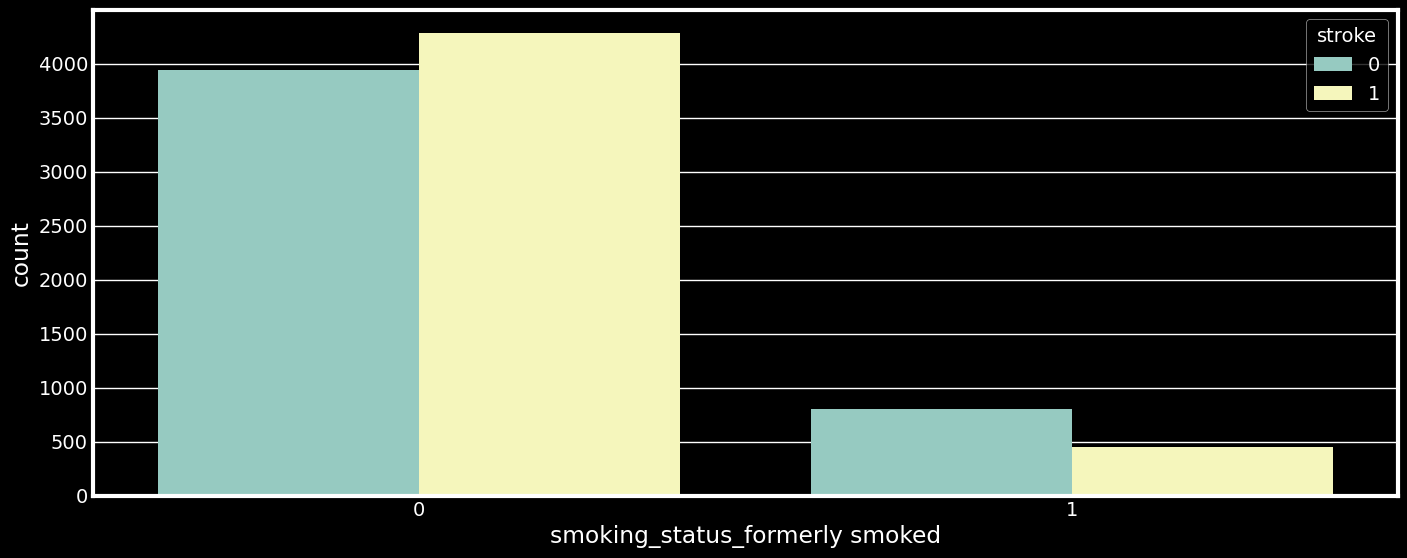

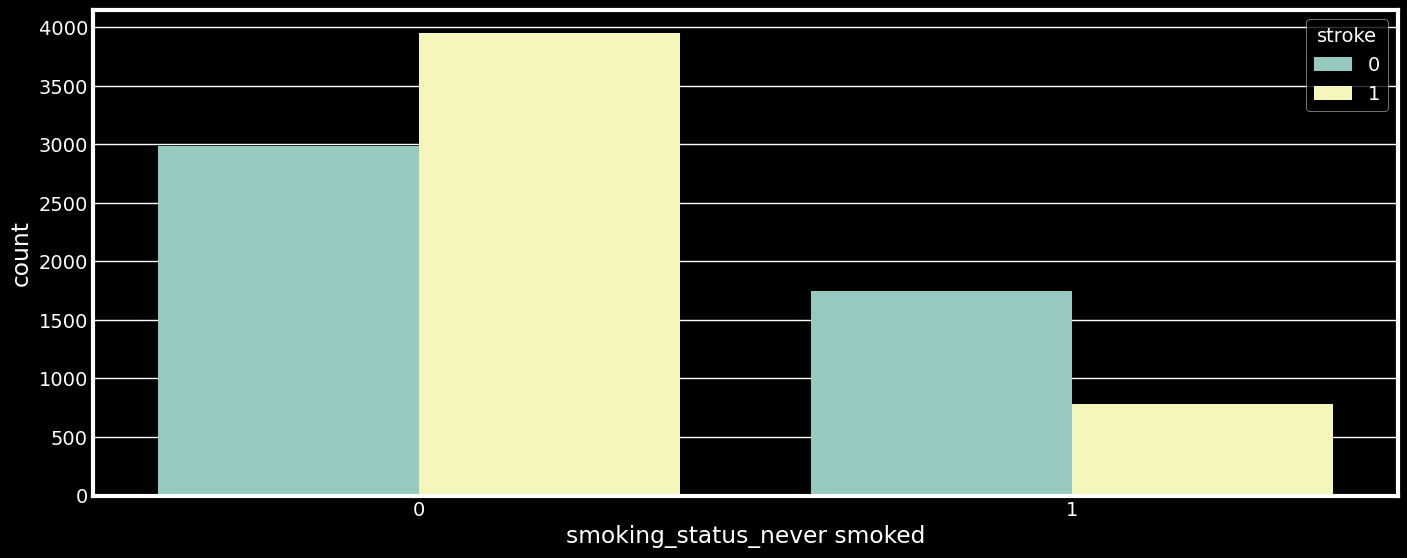

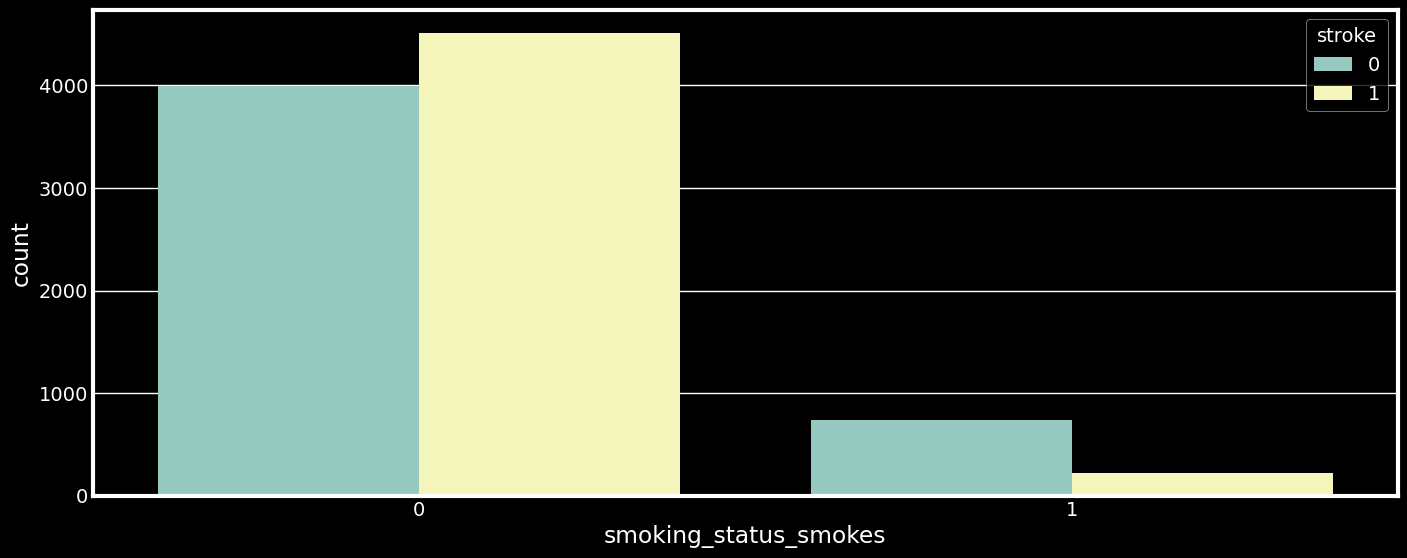

In [478]:
for i in cat_data.drop(['stroke'],axis=1).columns:
    plt.figure(figsize = (15,6))
    sns.countplot(data = cat_data, hue = 'stroke', x = cat_data[i])
    plt.show()

### Graphs of continuous variables

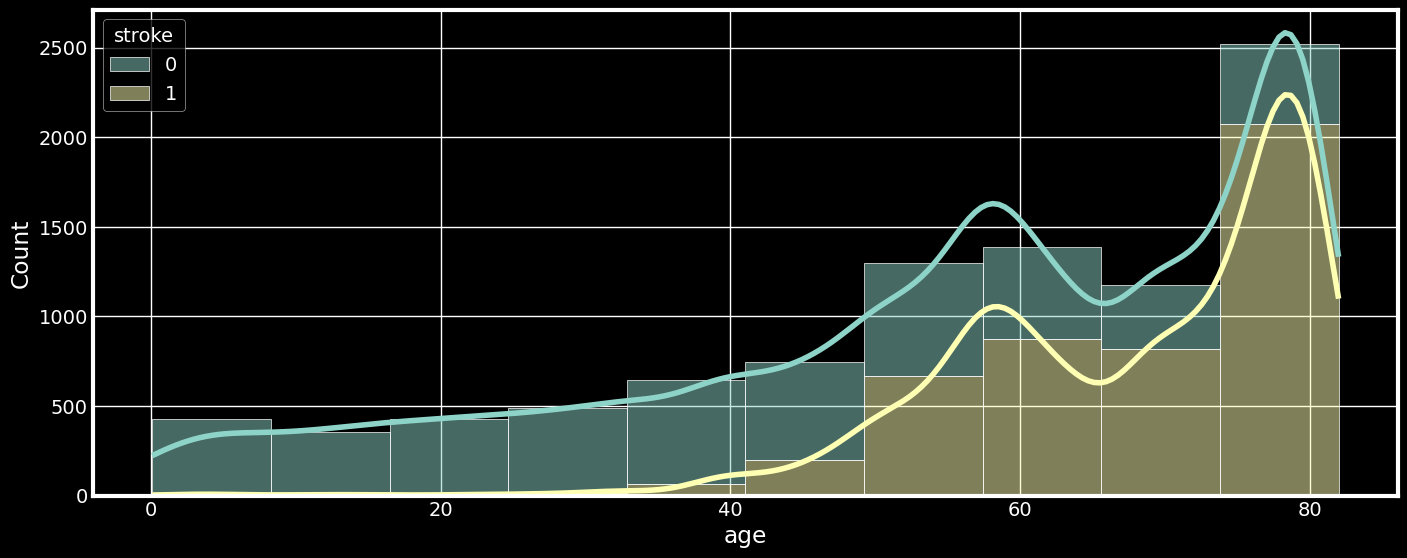

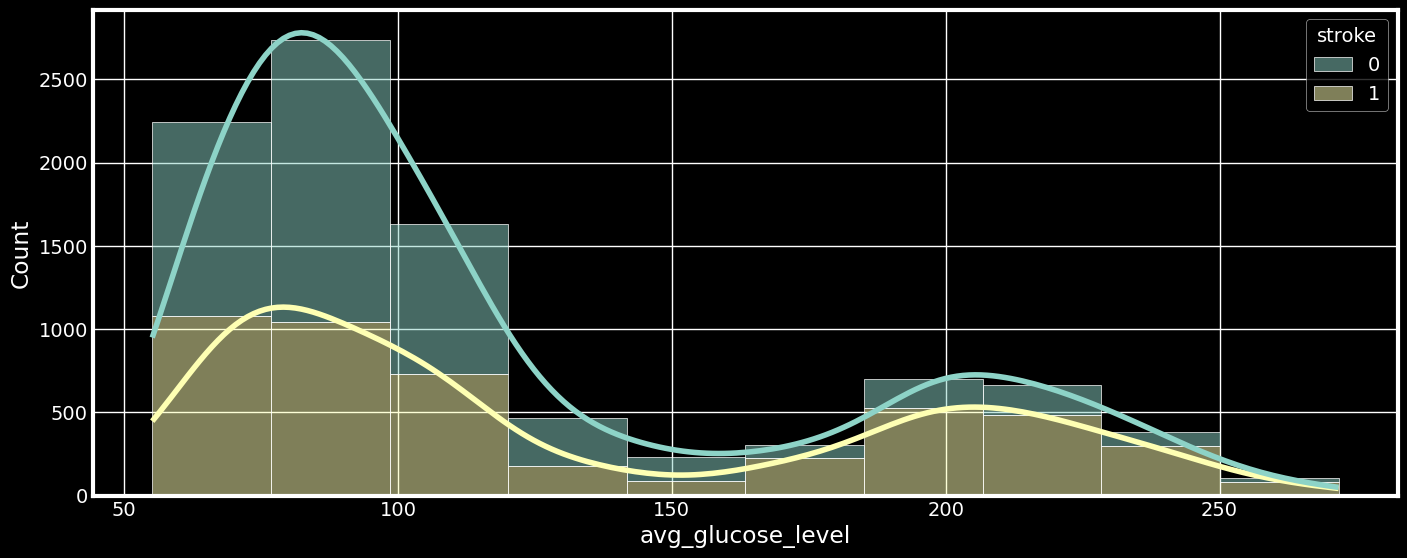

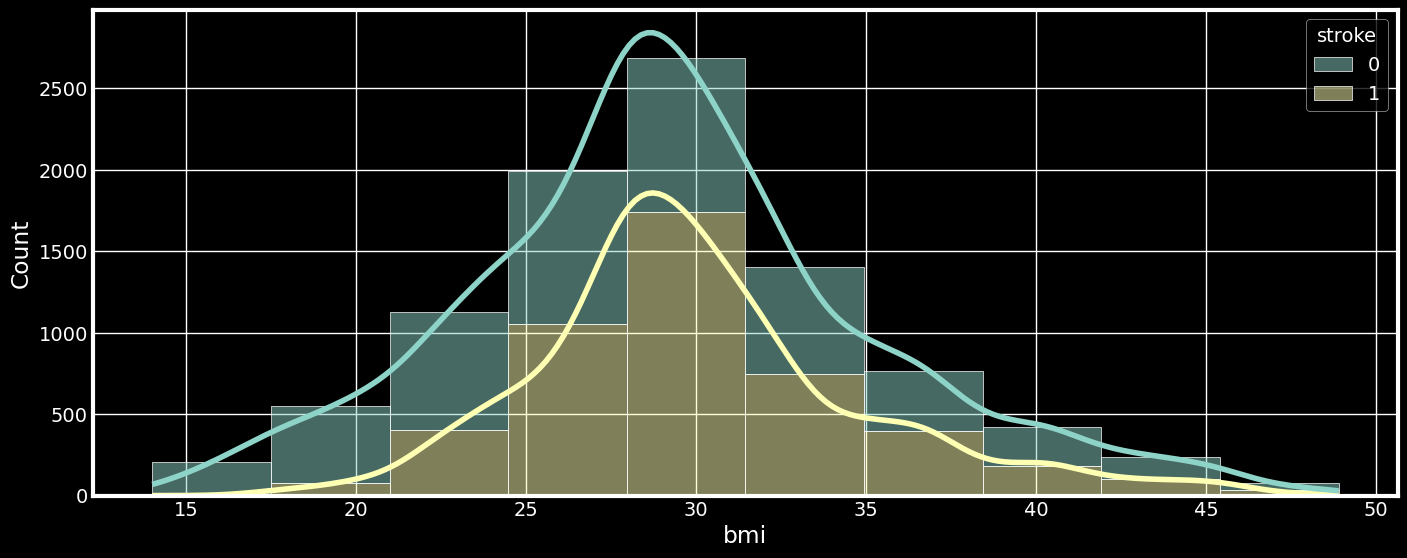

In [479]:


for i in con_data.columns:
    plt.figure(figsize = (15,6))
    sns.histplot(data=df, x=con_data[i], hue='stroke', multiple='stack', bins=10, kde=True)
    plt.show()



Age data summary:

In [480]:
X=df[df["gender"]==1].reset_index()  #Females
Y=df[df["gender"]==0].reset_index()   #Males

HR=df[df["stroke"]==1].reset_index()  #High Risk
LR=df[df["stroke"]==0].reset_index()  #Low Risk

#Calculate general characteristics
print("----------------General Data------------------")
print("Total Age =>")
print("Mean: {}".format(round(df["age"].mean())))
print("Median: {}".format(round(df["age"].median())))
print("Variance: {}".format(round(df["age"].var())))
print("Standard Deviation: {}\n".format(round((df["age"].std()),3)))

# Calculate gender specific characteristics
print("--------------Gender Specific Data-------------------")
print("For MEN =>")
print("Mean: {}".format(round(Y["age"].mean())))
print("Median: {}".format(round(Y["age"].median())))
print("Variance: {}".format(round(Y["age"].var())))
print("Standard Deviation: {}\n\n".format(round((Y["age"].std()),3)))

print("For WOMEN =>")
print("Mean: {}".format(round(X["age"].mean())))
print("Median: {}".format(round(X["age"].median())))
print("Variance: {}".format(round(X["age"].var())))
print("Standard Deviation: {}\n".format(round((X["age"].std()),3)))

# Calculate output specific characteristics
print("------------------Output Specific Data-----------------------")
print("For High Risk =>")
print("Mean: {}".format(round(HR["age"].mean())))
print("Median: {}".format(round(HR["age"].median())))
print("Variance: {}".format(round(HR["age"].var())))
print("Standard Deviation: {}\n\n".format(round((HR["age"].std()),3)))

print("For Low Risk =>")
print("Mean: {}".format(round(LR["age"].mean())))
print("Median: {}".format(round(LR["age"].median())))
print("Variance: {}".format(round(LR["age"].var())))
print("Standard Deviation: {}".format(round((LR["age"].std()),3)))

----------------General Data------------------
Total Age =>
Mean: 55
Median: 59
Variance: 484
Standard Deviation: 22.003

--------------Gender Specific Data-------------------
For MEN =>
Mean: 58
Median: 62
Variance: 445
Standard Deviation: 21.089


For WOMEN =>
Mean: 52
Median: 54
Variance: 509
Standard Deviation: 22.558

------------------Output Specific Data-----------------------
For High Risk =>
Mean: 68
Median: 71
Variance: 136
Standard Deviation: 11.667


For Low Risk =>
Mean: 42
Median: 43
Variance: 499
Standard Deviation: 22.345


### Correalation between every column and the specific correlation with the output.

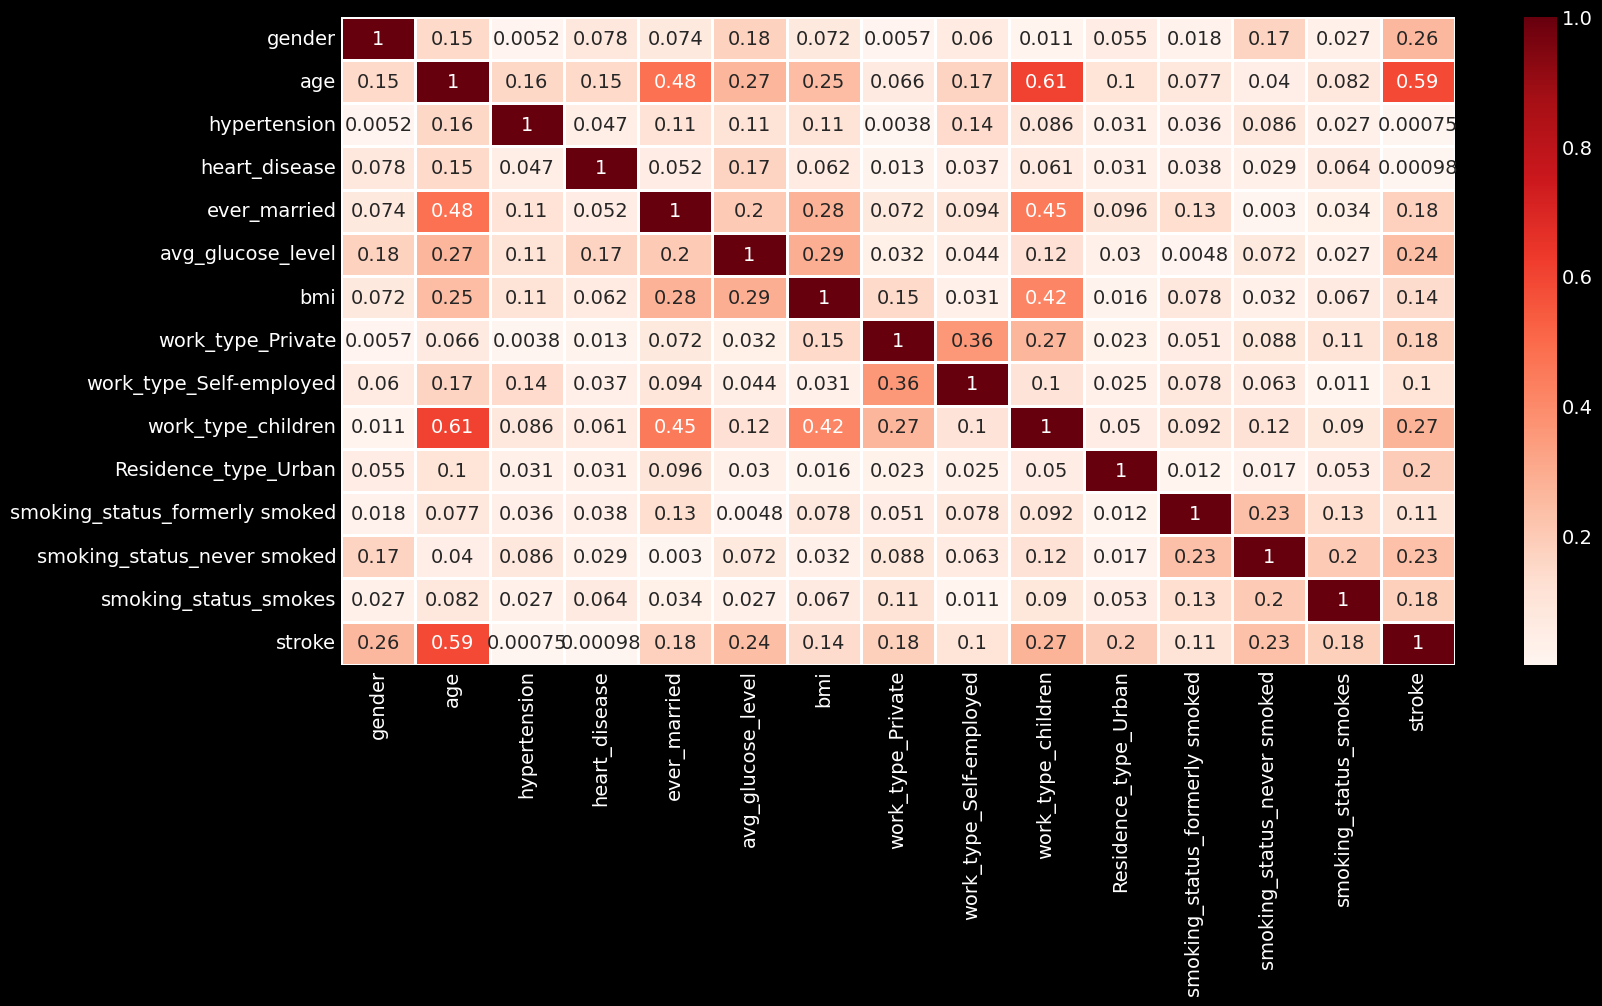

age                               0.586358
work_type_children                0.272620
gender                            0.259866
avg_glucose_level                 0.242407
smoking_status_never smoked       0.231347
Residence_type_Urban              0.195659
work_type_Private                 0.182244
smoking_status_smokes             0.180809
ever_married                      0.179188
bmi                               0.139061
smoking_status_formerly smoked    0.109088
work_type_Self-employed           0.100292
heart_disease                     0.000985
hypertension                      0.000749
Name: stroke, dtype: float64


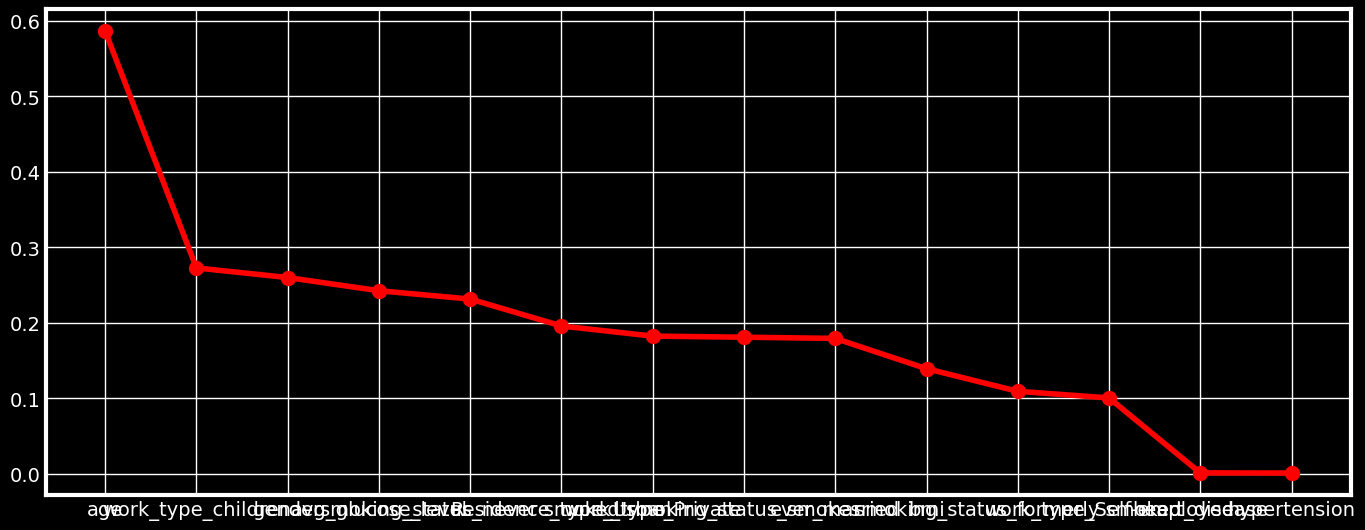

In [481]:
new_df=df
plt.figure(figsize=(16,8))
corr=new_df.corr()
sns.heatmap(abs(corr),lw=1,annot=True,cmap="Reds")
plt.show()

C=abs(corr["stroke"]).sort_values(ascending=False)[1:]
print(C)
plt.figure(figsize=(15,6))
plt.plot(C.index,C,color="red")
plt.scatter(C.index,C,color="red",lw=5)
plt.show()

### age seems to be quite correlated with 'stroke'

### Now check for outliers

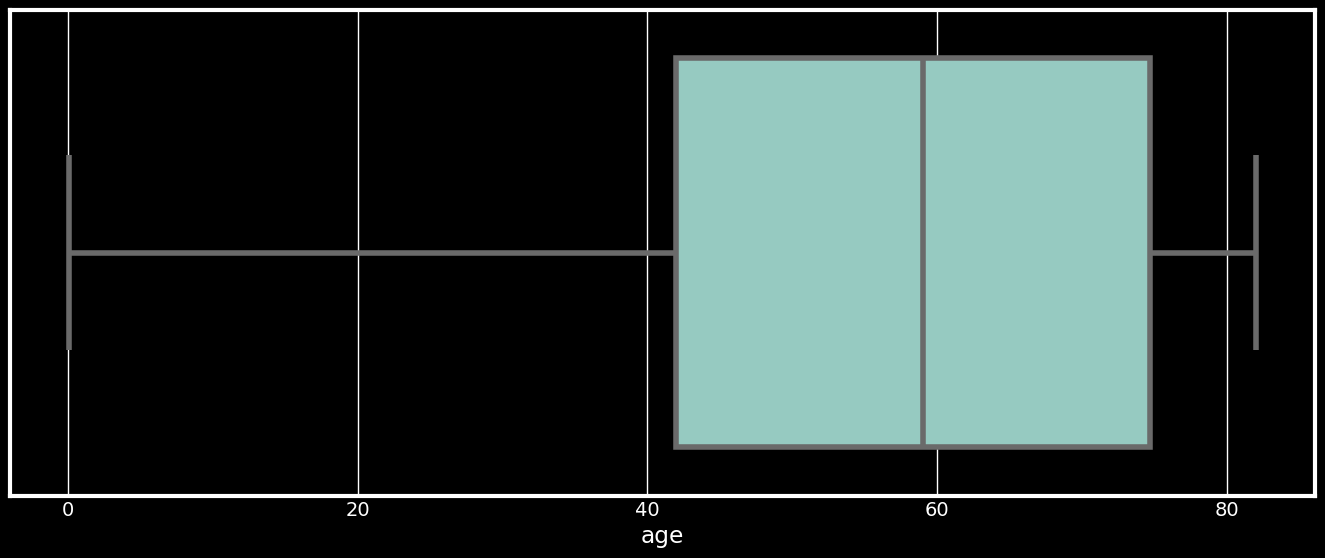

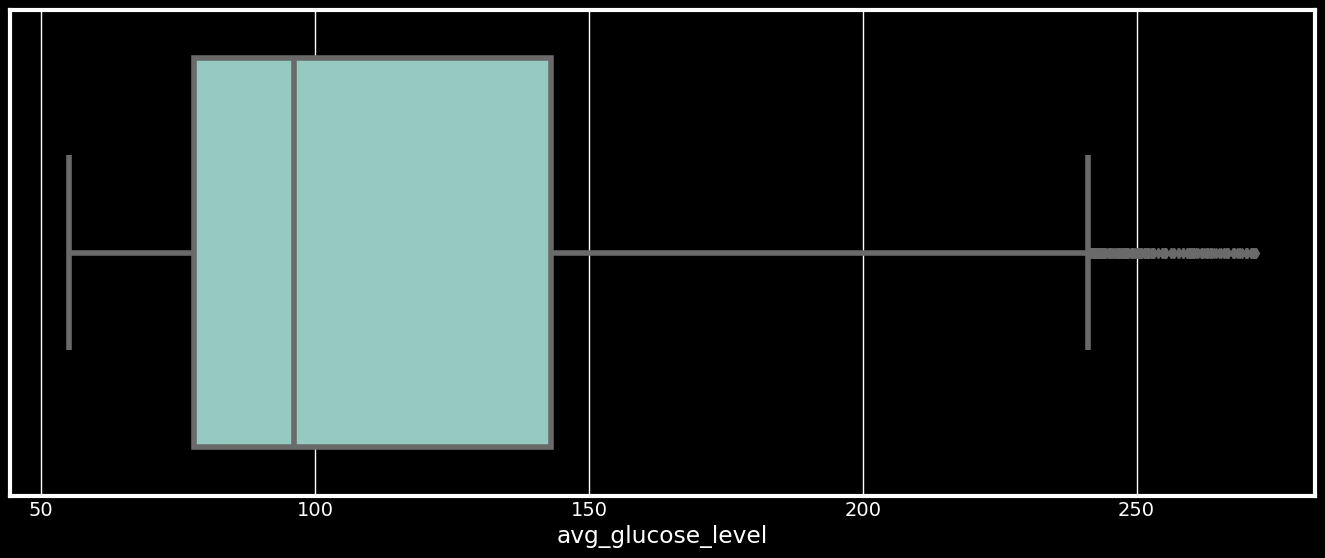

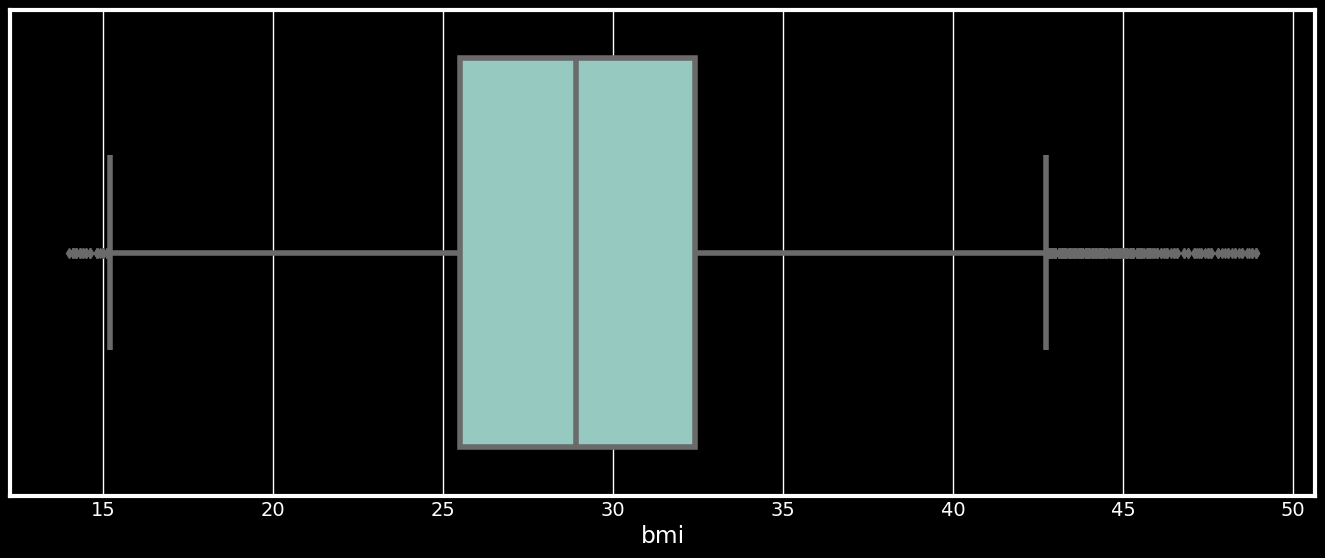

In [482]:
for i in con_data.columns:
    plt.figure(figsize = (15,6))
    sns.boxplot(data=df,x=i)
    plt.show()

The IQR method may not be suitable since avg glucose has two distant peaks.

I will instead choose to use the z score method

In [483]:
for k, v in con_data.items():
    z_scores = (v - v.mean()) / v.std()
    z_col = v[abs(z_scores) > 3]  # You can adjust the threshold value (e.g., 3) as needed
    perc = (z_col.shape[0] * 100.0) / v.shape[0]
    print("Column {} outliers = {} => {:.3f}%".format(k, len(z_col), perc))

Column age outliers = 0 => 0.000%
Column avg_glucose_level outliers = 0 => 0.000%
Column bmi outliers = 28 => 0.296%


There are not that many outliers.


### Data Splitting and scaling:

We will split the data into training and testing sets using train_test_split from sklearn.preprocessing. After splitting we will scale our data using the MinMax scaler before using it for training our model.


In [484]:
#Data Splitting
X=df.drop(['stroke'],axis=1)
Y=df["stroke"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=47) 

#MinMax Scaling / Normalization of data
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

In [485]:
def compute(Y_pred,Y_test):
    #Output plot
    plt.figure(figsize=(12,6))
    plt.scatter(range(len(Y_pred)),Y_pred,color="yellow",lw=5,label="Predictions")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Prediction Values vs Real Values")
    plt.legend()
    plt.show()

    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["low-risk", "high-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    #Calculate Metrics
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

# Logistic Regression

Execution time of model: 0.02897 seconds



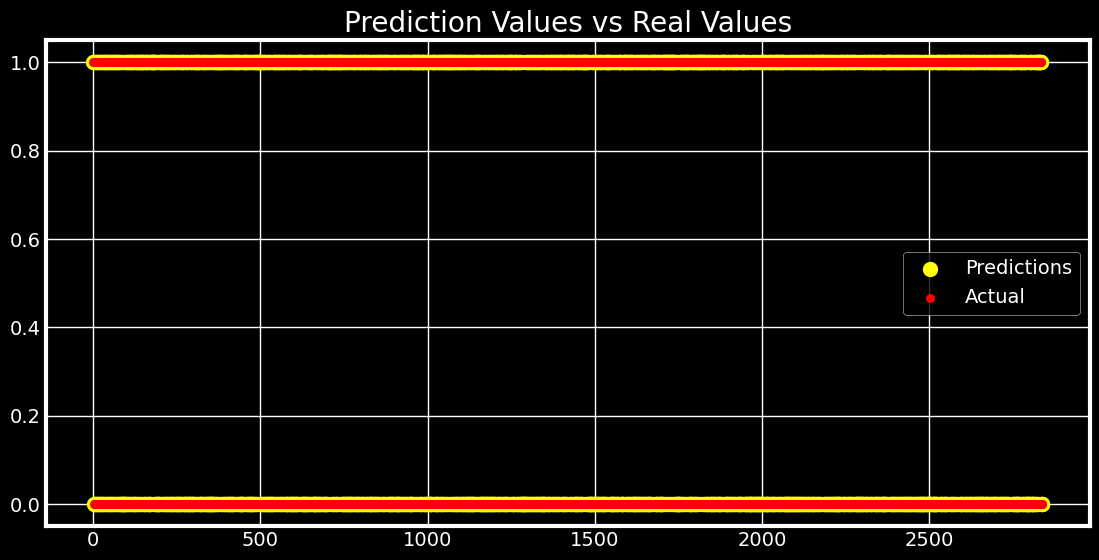

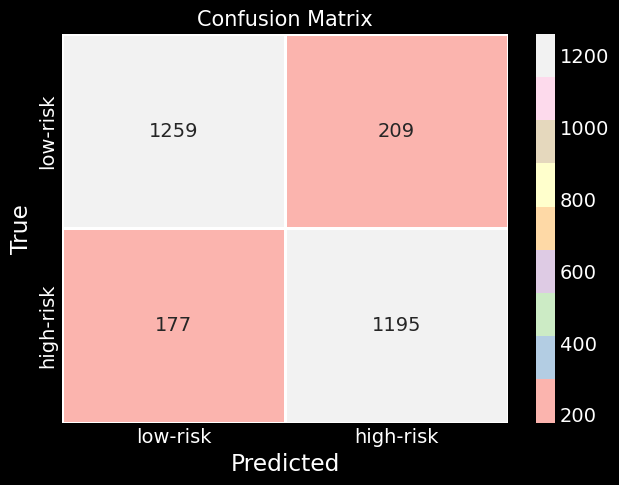

Precision: 0.851 
Recall: 0.871 
F1-Score: 0.861 
Accuracy: 86.408 %
Mean Square Error: 0.136


In [486]:
#Build Model
start = time.time()

model_Log= LogisticRegression(random_state=10)
model_Log.fit(X_train,Y_train)
Y_pred= model_Log.predict(X_test)

end=time.time()

model_Log_time=end-start
model_Log_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_Log_time),5)} seconds\n")
#Plot and compute metrics
compute(Y_pred,Y_test)

# k nearest neighbours

Execution time of model: 0.23052 seconds


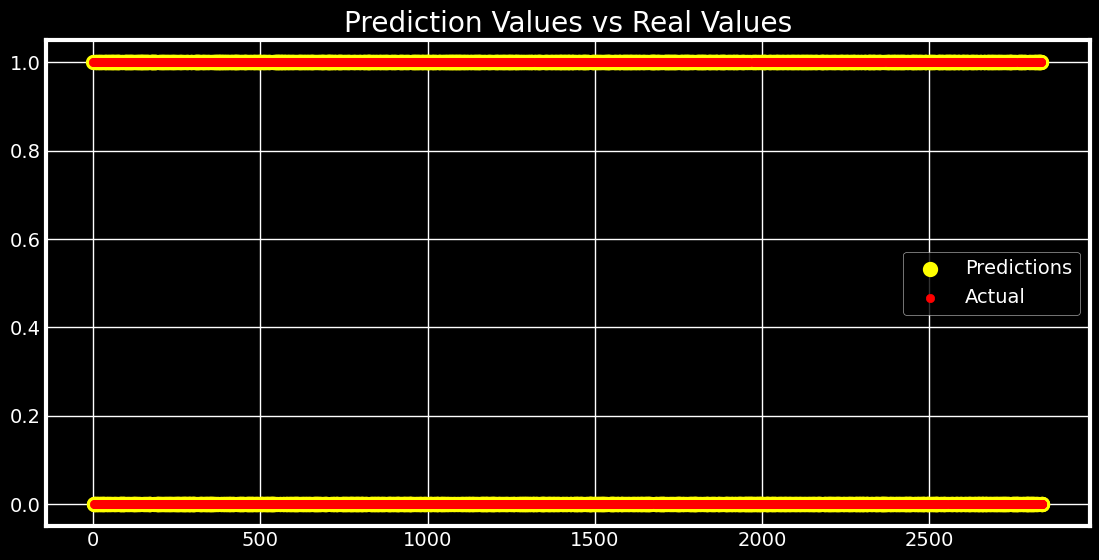

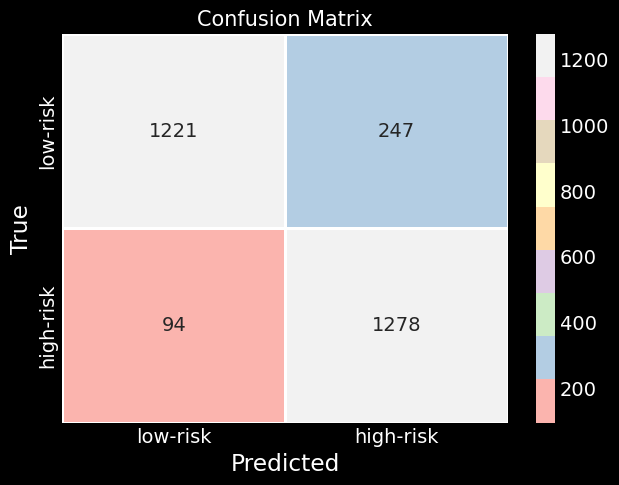

Precision: 0.838 
Recall: 0.931 
F1-Score: 0.882 
Accuracy: 87.993 %
Mean Square Error: 0.12


In [487]:
#Build Model
start=time.time()

model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train,Y_train)
Y_pred = model_KNN.predict(X_test)

end=time.time()

model_KNN_time = end-start
model_KNN_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_KNN_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# support vector machines

Execution time of model: 0.85764 seconds


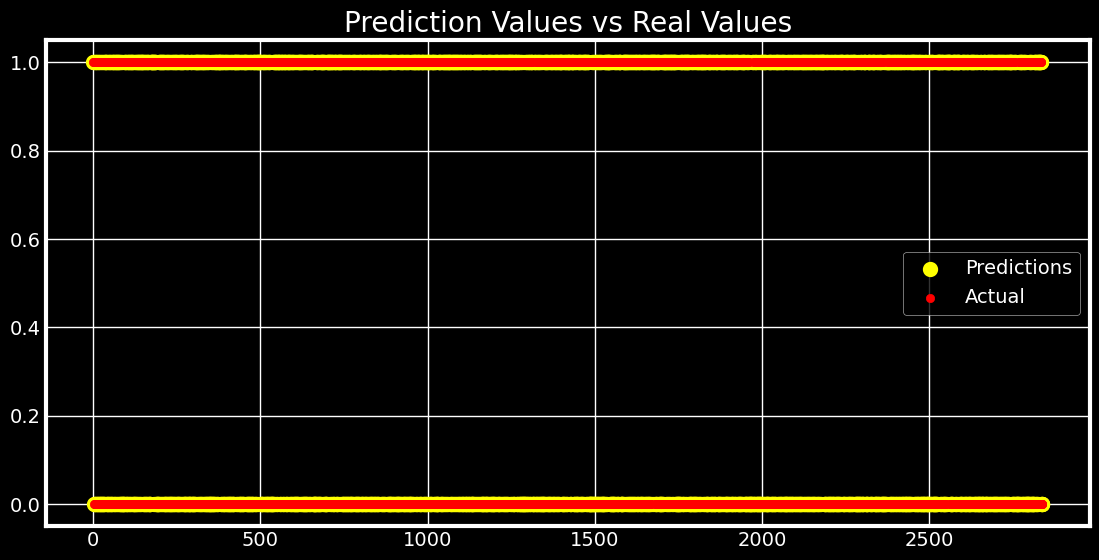

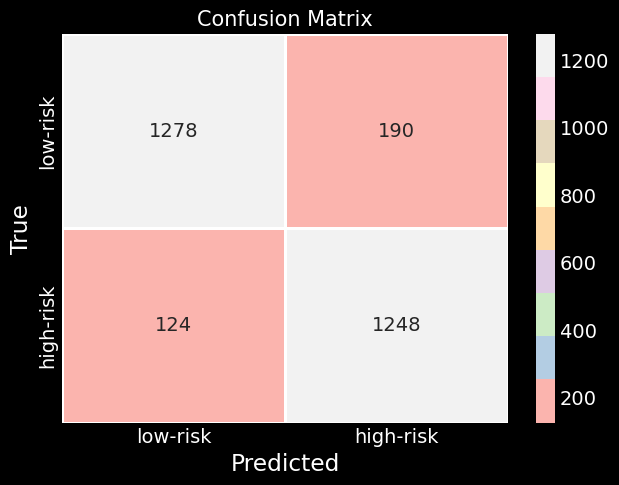

Precision: 0.868 
Recall: 0.91 
F1-Score: 0.888 
Accuracy: 88.944 %
Mean Square Error: 0.111


In [488]:
#Build Model
start=time.time()

model_svm=SVC(kernel="rbf")
model_svm.fit(X_train,Y_train)
Y_pred=model_svm.predict(X_test)

end=time.time()

model_svm_time=end-start
model_svm_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_svm_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# Decision Tree Classifier

Execution time of model: 0.03128 seconds


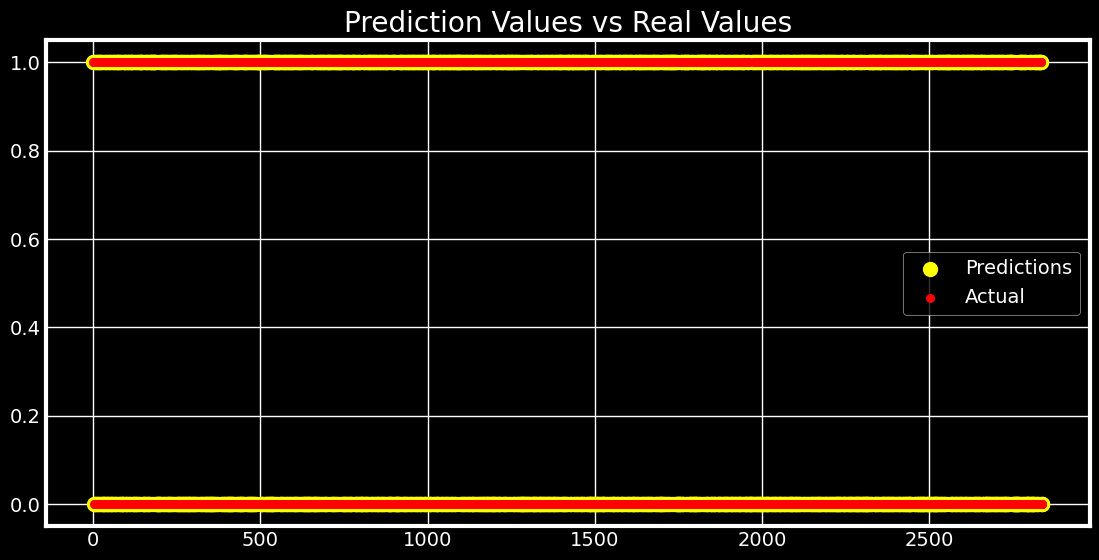

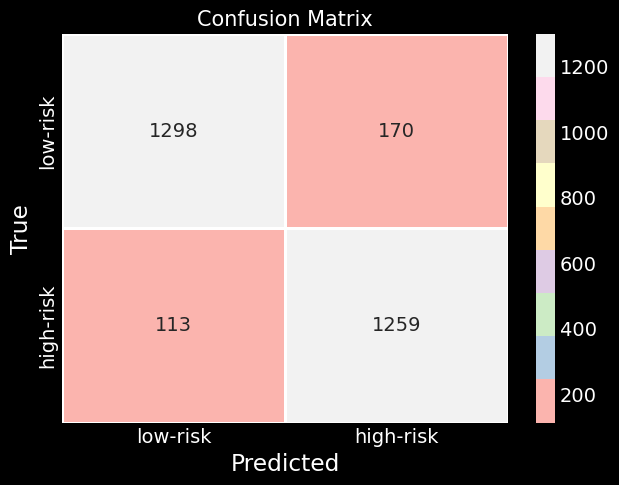

Precision: 0.881 
Recall: 0.918 
F1-Score: 0.899 
Accuracy: 90.035 %
Mean Square Error: 0.1


In [489]:
#Build Model
start=time.time()

model_tree=DecisionTreeClassifier(random_state=10,criterion="gini",max_depth=100)
model_tree.fit(X_train,Y_train)
Y_pred=model_tree.predict(X_test)

end=time.time()

model_tree_time=end-start
model_tree_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_tree_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# Random Forest

Execution time of model: 2.31468 seconds


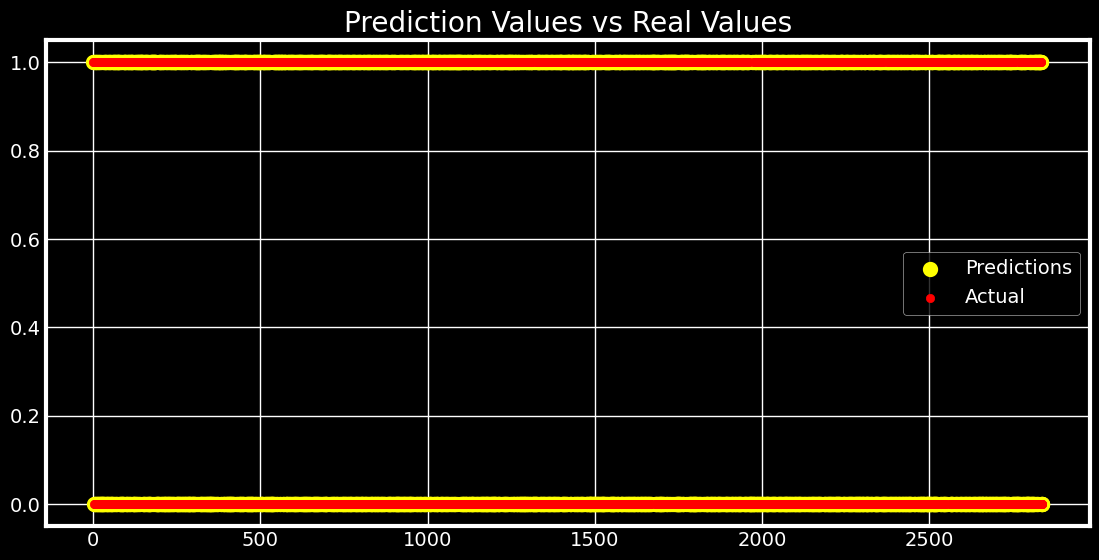

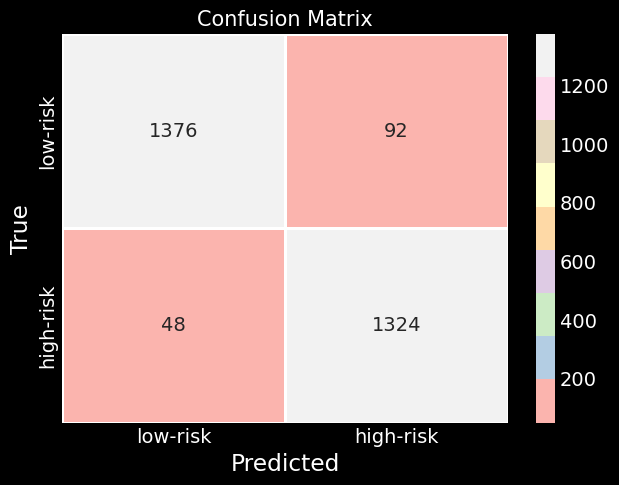

Precision: 0.935 
Recall: 0.965 
F1-Score: 0.95 
Accuracy: 95.07 %
Mean Square Error: 0.049


In [490]:
#Build Model
start=time.time()

model_RF = RandomForestClassifier(n_estimators=300,criterion="gini",random_state=5,max_depth=100)
model_RF.fit(X_train,Y_train)
Y_pred=model_RF.predict(X_test)

end=time.time()

model_RF_time=end-start
model_RF_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_RF_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# Adaboost

Execution time of model: 0.17336 seconds


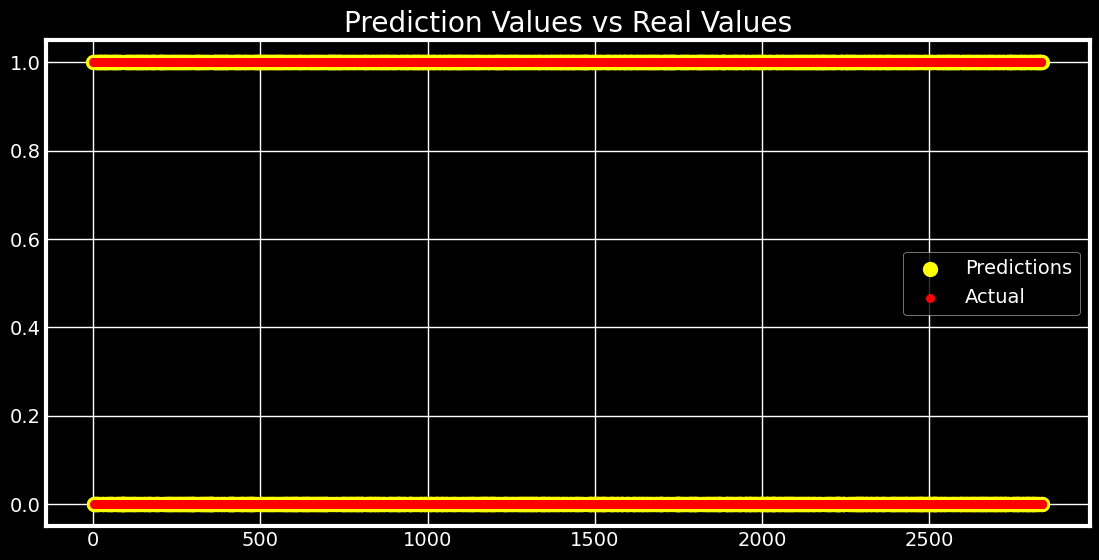

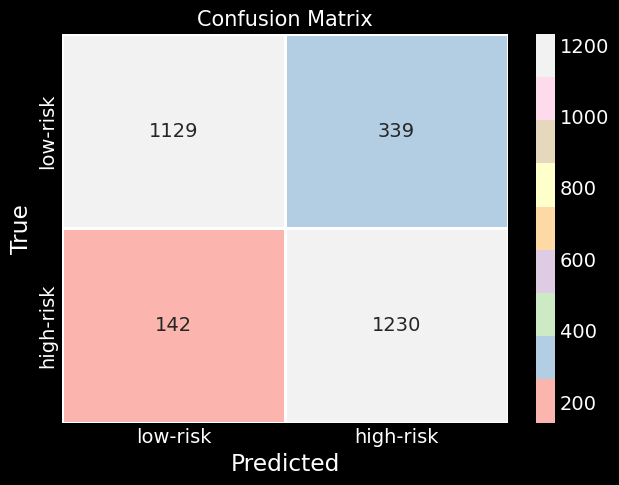

Precision: 0.784 
Recall: 0.897 
F1-Score: 0.836 
Accuracy: 83.063 %
Mean Square Error: 0.169


In [491]:
#Build Model
start=time.time()

model_ADA=AdaBoostClassifier(learning_rate= 0.3,n_estimators= 25)
model_ADA.fit(X_train,Y_train)
Y_pred= model_ADA.predict(X_test)

end=time.time()

model_ADA_time=end-start
model_ADA_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_ADA_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# Gradient Boosting Classifier

Execution time of model: 0.90398 seconds


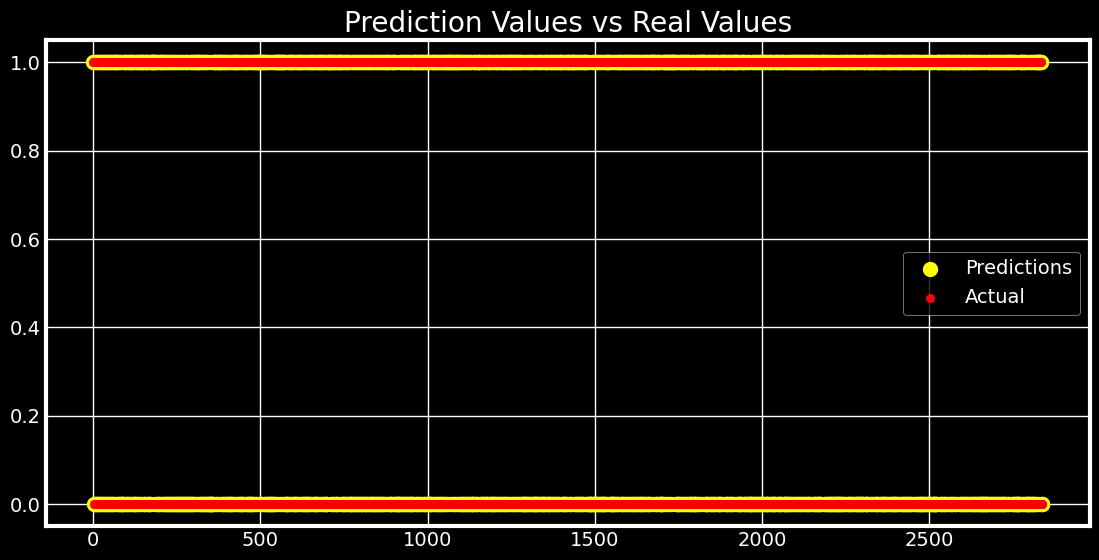

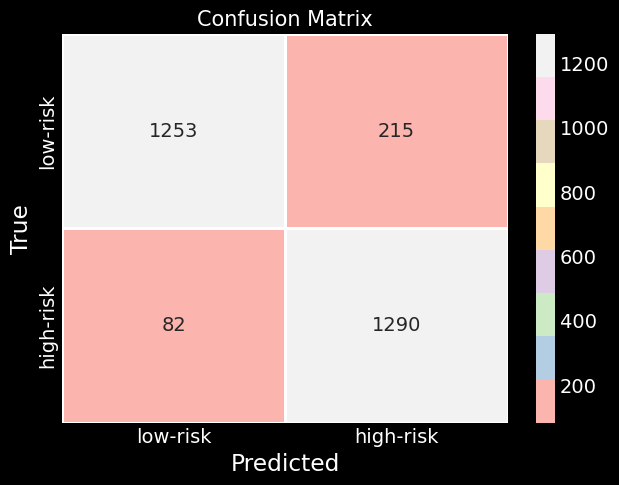

Precision: 0.857 
Recall: 0.94 
F1-Score: 0.897 
Accuracy: 89.542 %
Mean Square Error: 0.105


In [492]:
#Build Model
start=time.time()

model_GB = GradientBoostingClassifier(
    random_state=10,
    n_estimators=100,
    learning_rate=0.3,     
    loss="deviance"
)
model_GB.fit(X_train,Y_train)
Y_pred= model_GB.predict(X_test)

end=time.time()

model_GB_time=end-start
model_GB_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_GB_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# XGBoost Classifier

Execution time of model: 0.46467 seconds


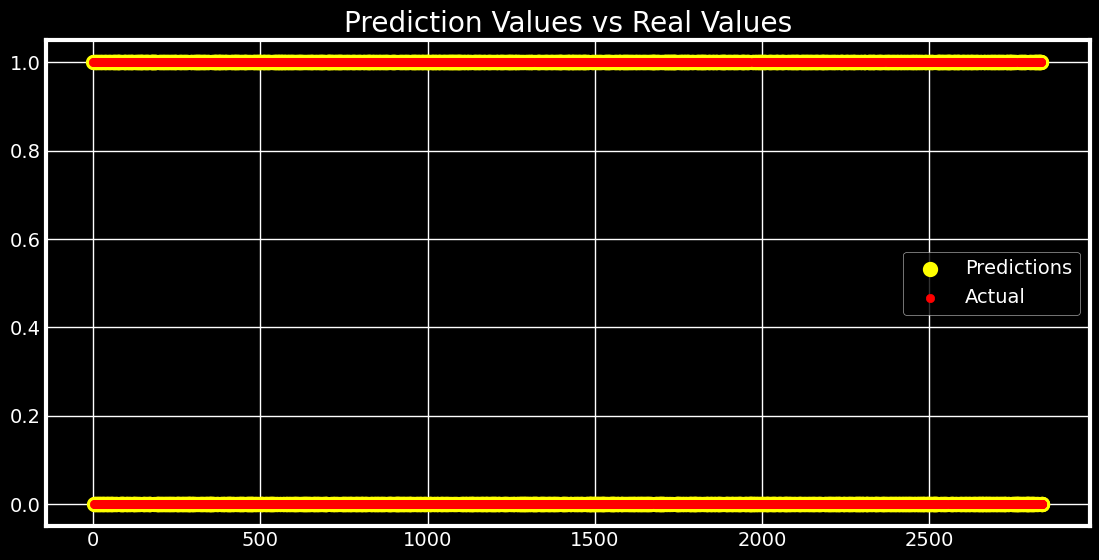

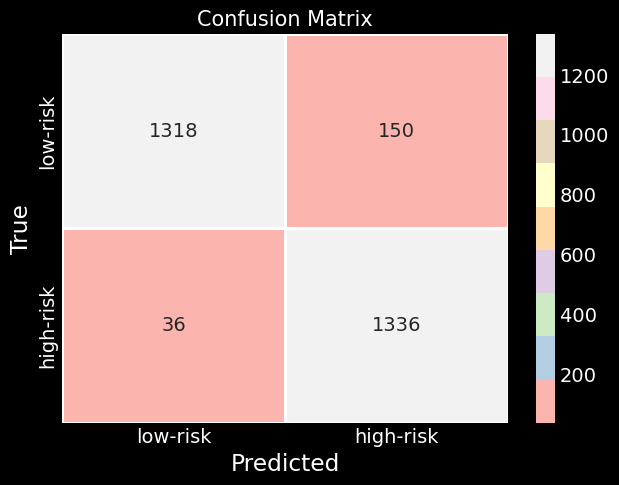

Precision: 0.899 
Recall: 0.974 
F1-Score: 0.935 
Accuracy: 93.451 %
Mean Square Error: 0.065


In [493]:
#Build Model
start=time.time()

model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,
                          max_depth=10,
                          n_estimators = 100,
                          colsample_bytree = 0.5)
model_xgb.fit(X_train,Y_train)
Y_pred = model_xgb.predict(X_test)

end=time.time()

model_xgb_time=end-start
model_xgb_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_xgb_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

 # MLP Classifier

Execution time of model: 14.7514 seconds


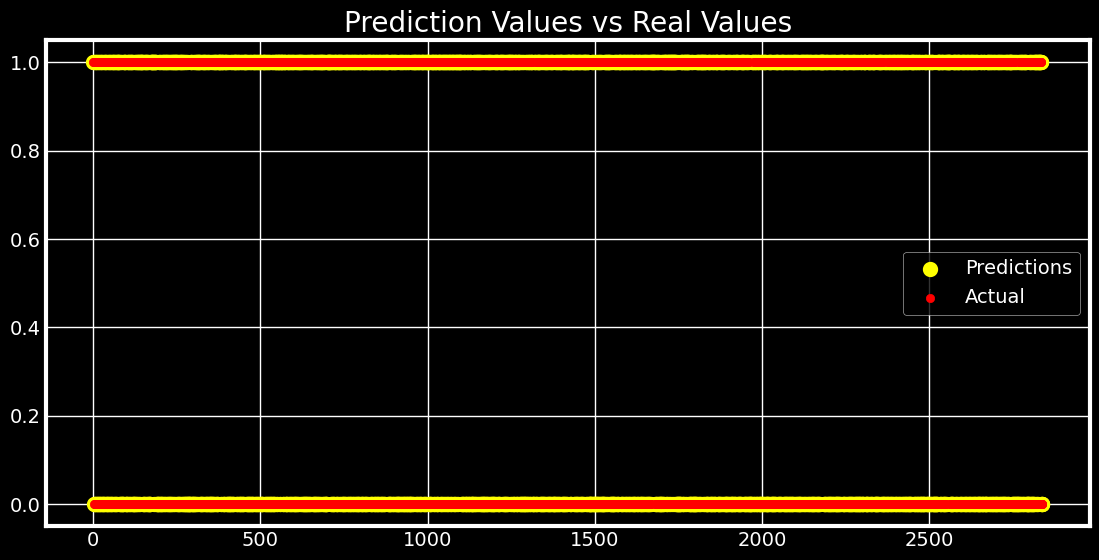

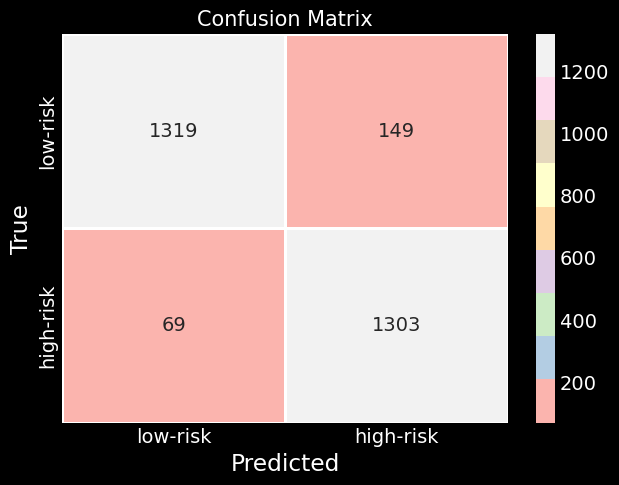

Precision: 0.897 
Recall: 0.95 
F1-Score: 0.923 
Accuracy: 92.324 %
Mean Square Error: 0.077


In [494]:
#Build Model
start=time.time()

model_MLP = MLPClassifier(random_state=48,hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam')
model_MLP.fit(X_train, Y_train)
Y_pred=model_MLP.predict(X_test)

end=time.time()

model_MLP_time=end-start
model_MLP_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_MLP_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

# Compare Accuracy and Execution Time

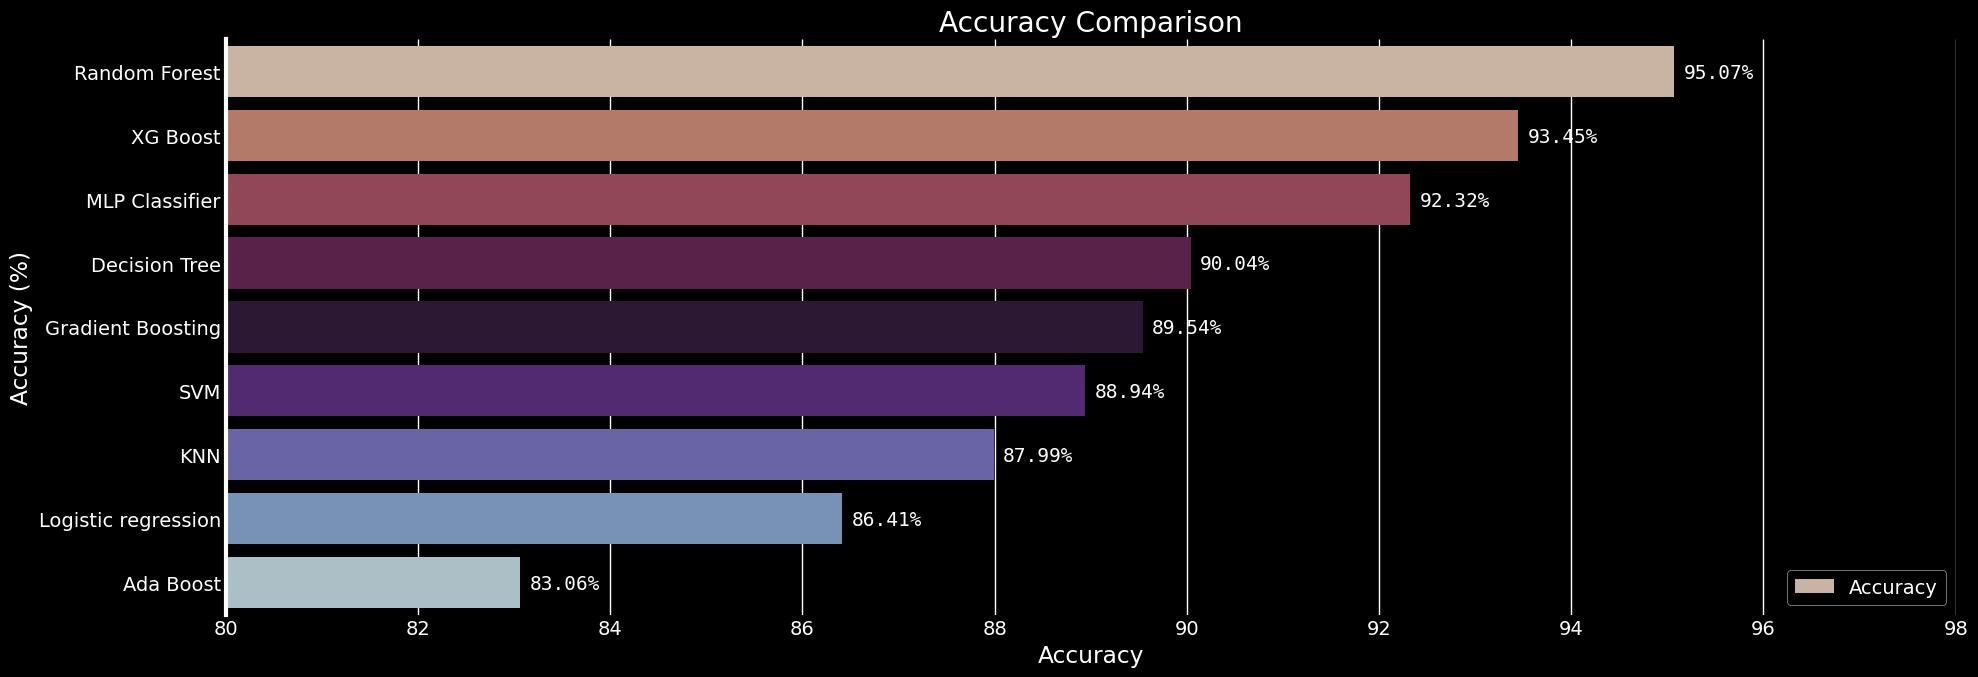

In [495]:
accuracies={"Logistic regression": round(model_Log_accuracy, 3),
            "KNN": round(model_KNN_accuracy, 3),
            "SVM": round(model_svm_accuracy, 3),
            "Decision Tree":round(model_tree_accuracy, 3),
            "Random Forest": round(model_RF_accuracy, 3),
            "Ada Boost": round(model_ADA_accuracy, 3),
            "Gradient Boosting": round(model_GB_accuracy, 3),
            "XG Boost": round(model_xgb_accuracy, 3),
            "MLP Classifier": round(model_MLP_accuracy, 3)}

acc_list=accuracies.items()
k,v = zip(*acc_list) 
temp=pd.DataFrame(index=k,data=v,columns=["Accuracy"])
temp.sort_values(by=["Accuracy"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ACC=sns.barplot(y=temp.index,x=temp["Accuracy"],label="Accuracy",linewidth=3,orient="h",palette="twilight_r")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison")
plt.xlim(80,98)

ACC.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ACC.spines[w].set_visible(False)
    
#Write text on barplots
k=0
for ACC in ACC.patches:
    width = ACC.get_width()
    plt.text(width+0.1, (ACC.get_y() + ACC.get_height()-0.3),s="{}%".format(temp["Accuracy"][k]),fontname = 'monospace', fontsize = 14, color = 'white') 
    k+=1
    
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

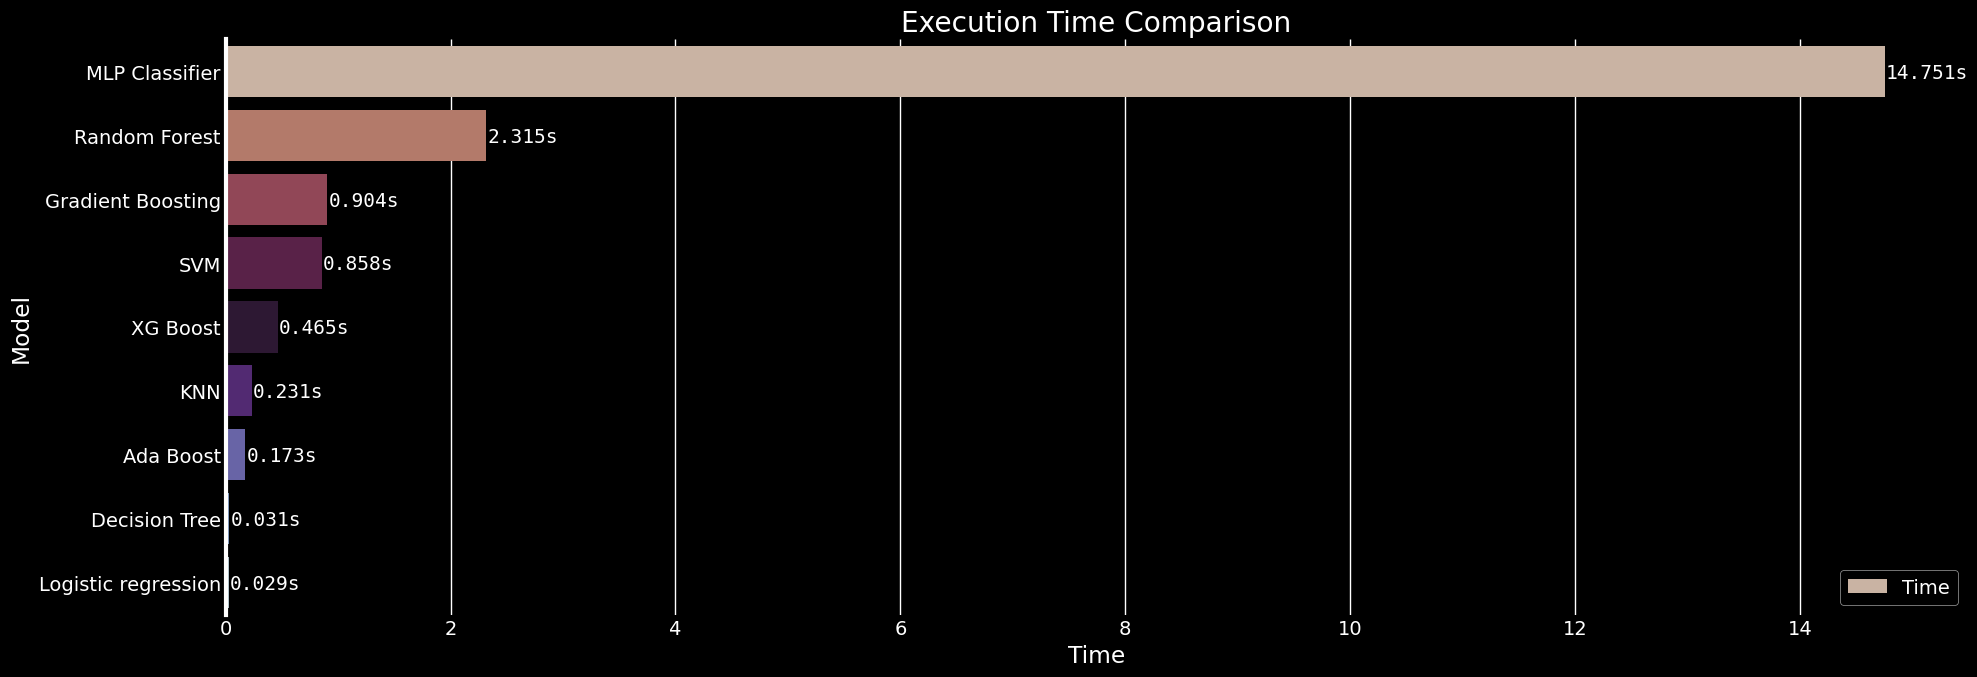

In [496]:
exe_time={"Logistic regression": model_Log_time,
            "KNN": model_KNN_time,
            "SVM": model_svm_time,
            "Decision Tree": model_tree_time,
            "Random Forest": model_RF_time,
            "Ada Boost": model_ADA_time,
            "Gradient Boosting": model_GB_time,
            "XG Boost": model_xgb_time,
            "MLP Classifier": model_MLP_time }

time_list=exe_time.items()
k,v = zip(*time_list) 
temp1=pd.DataFrame(index=k,data=v,columns=["Time"])
temp1.sort_values(by=["Time"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ET=sns.barplot(y=temp1.index,x=temp1["Time"],label="Time",linewidth=3,orient="h",palette="twilight_r")
plt.ylabel("Model")
plt.title("Execution Time Comparison")
ET.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ET.spines[w].set_visible(False)

#Write text on barplots
k=0
for ET in ET.patches:
    width = ET.get_width()
    plt.text(width+0.01, (ET.get_y() + ET.get_height()-0.3),s="{}s".format(round((temp1["Time"][k]),3)),fontname = 'monospace', fontsize = 14, color = 'white') 
    k+=1

plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# __Conclusion:__

In this project, we analyzed a stroke dataset, performed data preprocessing, exploration, and built various machine learning models to predict strokes. We focused on addressing the class imbalance by oversampling and used MinMax scaling for feature normalization. We explored correlations and potential outliers in the data and then proceeded to build and evaluate multiple classification models.

We implemented nine different models including Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree, Random Forest, AdaBoost, Gradient Boosting, XG Boost, and Multi-Layer Perceptron (MLP) Classifier. We evaluated these models based on their accuracy, execution time, and confusion matrices to understand their performance.

The accuracy comparison among models showed that the Random Forest model achieved the highest accuracy, closely followed by XG Boost and MLP Classifier. The MLP Classifier exhibited the longest execution time, while the Logistic Regression model had the shortest execution time.